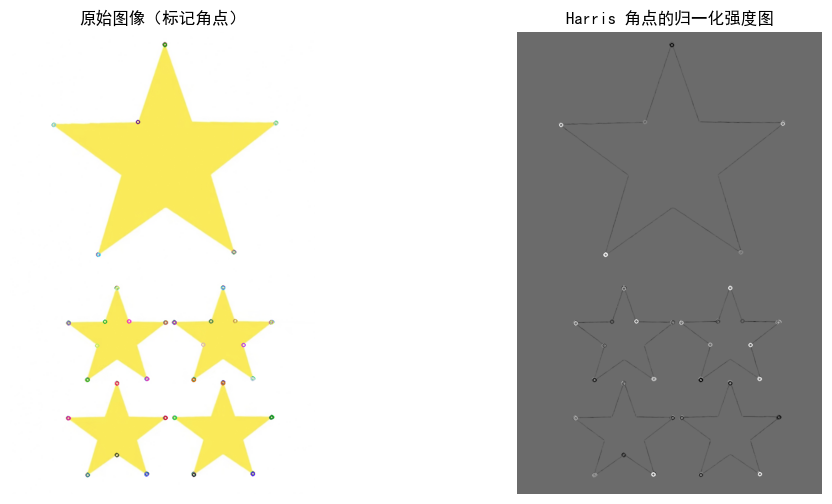

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 设置全局变量
thresh =60
max_thresh = 250

# 读取图像
g_srcImage = cv2.imread("D:/picture/wujiaoxing.jpg")
if g_srcImage is None:
    print("src image load failed!")
    exit()

g_srcImage1 = g_srcImage.copy()

# 转换为灰度图像
g_grayImage = cv2.cvtColor(g_srcImage1, cv2.COLOR_BGR2GRAY)

# 回调函数
def on_CornerHarris(val):
    global g_srcImage1
    
    # 初始化图像
    dstImage = np.zeros(g_srcImage.shape, dtype=np.float32)
    g_srcImage1 = g_srcImage.copy()

    # 进行 Harris 角点检测
    cornerStrength = cv2.cornerHarris(g_grayImage, 2, 3, 0.03)

    # 归一化与转换
    normImage = cv2.normalize(cornerStrength, None, 0, 255, cv2.NORM_MINMAX)
    scaleImage = np.uint8(normImage)

    # 在图像上绘制角点
    for j in range(normImage.shape[0]):
        for i in range(normImage.shape[1]):
            if normImage[j, i] > thresh + 60:
                color = (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255))
                cv2.circle(g_srcImage1, (i, j), 5, color, 2)
                cv2.circle(scaleImage, (i, j), 5, color, 2)
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体显示中文
    plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
    # 使用 plt 展示结果
    plt.figure(figsize=(12, 6))

    # 显示原图并绘制角点
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(g_srcImage1, cv2.COLOR_BGR2RGB))  # 转换为 RGB 格式显示
    plt.title("原始图像（标记角点）")
    plt.axis('off')

    # 显示归一化后的图像
    plt.subplot(1, 2, 2)
    plt.imshow(scaleImage, cmap='gray')
    plt.title("Harris 角点的归一化强度图")
    plt.axis('off')

    plt.show()

# 创建滑动条，初始化回调函数
on_CornerHarris(0)
